## Data Analysis of our survey (phone version)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import networkx as nx
import ast
import math
import re
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

### Demographis statictical

In [2]:
df_clean_phone = pd.read_csv('./Adversarial-round1-phone-cleaned.csv')

In [3]:
display(df_clean_phone["What is your level of English proficiency"].value_counts())
display(df_clean_phone["Please select your race identity: - Selected Choice"].value_counts())
display(df_clean_phone["What is the highest level of education you are in or have completed? - Selected Choice"].value_counts())
display(df_clean_phone["Please select your gender identity:"].value_counts())
display(df_clean_phone["Which country or region do you currently identify as being from?"].value_counts())
display(df_clean_phone["How long have you been using social media?"].value_counts())

What is your level of English proficiency
First language           21
Fluent but not native    20
Native speaker           19
Name: count, dtype: int64

Please select your race identity: - Selected Choice
Black or African American                                            27
White                                                                23
Hispanic or Latino                                                    5
Another race not listed here (please specify):                        2
Asian                                                                 2
Hispanic or Latino,Another race not listed here (please specify):     1
Name: count, dtype: int64

What is the highest level of education you are in or have completed? - Selected Choice
Bachelor’s degree                      26
Master's degree or higher education    14
High school diploma/GED                 9
Doctoral (Doctor's) degree              5
Associate degree                        3
Professional school                     2
Prefer not to disclose                  1
Name: count, dtype: int64

Please select your gender identity:
Male      31
Female    29
Name: count, dtype: int64

Which country or region do you currently identify as being from?
SouthAfrica          27
UnitedStates         10
Canada                5
Belgium               2
Chile                 2
Mexico                2
UnitedKingdom         2
Algeria               1
Zimbabwe              1
Italy                 1
NewZealand            1
Portugal              1
Nigeria               1
Ireland(Republic)     1
CzechRepublic         1
RussianFederation     1
Poland                1
Name: count, dtype: int64

How long have you been using social media?
15-20 years           21
10-15 years           13
5-10 years            12
More than 20 years     8
1-5 years              5
Less than 1 year       1
Name: count, dtype: int64

### Analysis

In [4]:
df = pd.read_csv("./Adversarial-round1-phone-cleaned.csv")
display(df)

,Response Type,Progress,Duration (in seconds),Finished,User Language,"We are a research group at the University of Tennessee, Knoxville, headed by Dr. Doowon Kim. We are seeking participants to contribute to our study on adversarial text attacks in LLM-assisted platforms.\n\n\n\nThe purpose of this study is to investigate how adversarial text attacks can evade detection in LLM-assisted platforms and assess the differences between human and LLM detection capabilities. The survey should take approximately 10 - 15 minutes to complete. Upon completing the survey, you will receive a completion code. Please retain this code. If you wish to request the removal of your data after completing the survey, contact us and provide your completion code.\n\n \n\nThere are two components to the survey:\n\nPart 1: Demographic Questions.\nPart 2: Adversarial Text Recognition Task\n\n\nPart 3: Decision Adjustment\n \n\nConsent Form\n\n \n\nWARNING: Some of the texts in this study may contain aggressive, harmful, or offensive content as part of the research on adversarial attacks. If at any point you feel uncomfortable, you may stop the study and withdraw your participation without any consequences. Your participation is completely voluntary, and you may choose to exit the survey at any time.\n\n \n\nIf you experience emotional distress or discomfort during or after the study, we encourage you to seek support. Students at the University of Tennessee can contact the Student Health Center Counseling Center for confidential support:\n\n📞 Phone: (865) 974-2196\n🌐 Website: https://studentlife.utk.edu/counselingcenter/\n📍 Location: 1800 Volunteer Blvd, Knoxville, TN 37996\n\n \n\nAll responses will be anonymized, and no personally identifiable information will be retained. The only risk associated with participation is the minimal risk of loss of confidentiality; however, all collected data will be de-identified and used solely for research purposes.\n\n \n\nWhile there are no direct benefits to you, your participation will contribute to a better understanding of adversarial text detection and may ultimately help improve security mechanisms for LLM-assisted platforms.\n\n \n\nTo participate in this study, you must meet the following criteria:\n\n1) You are at least 18 years old.\n2) You are able to complete the survey in English.\n\n\nParticipants who provide their contact information and finish the survey will be entered into a raffle for a chance to win a $10 gift card (e.g., Amazon). The odds of winning a gift card in the raffle are 1 in 10. Your email address will only be used to contact the gift card winners and will be removed from the dataset upon completion of the study.\n\n\n\nIf you have questions about the study or wish to remove your response after completion, you may contact Dr. Kim at doowon@utk.edu. Please provide your completion code if you would like your response to be removed. For questions about your rights as a research participant, please contact the University of Tennessee Institutional Review Board (UTK IRB) at utkirb@utk.edu or (865) 974-7697. If you wish to participate in the raffle but do not take part in the study, please email the investigator at doowon@utk.edu. - Selected Choice",What is your level of English proficiency,How many years did you learn English?,Please select your age range:,Please select your race identity: - Selected Choice,...,17-b,17-b-id,18-a,18-a-id,18-b,18-b-id,19-a,19-a-id,19-b,19-b-id
0,IP Address,100,276,True,EN,"Yes, I will finish the survey but I don't want...",Fluent but not native,15,18 - 24,White,...,xpqr ttpbk qfibcrzpi <b>y</b> qdsojyb <b>o</b>...,66.0,Y nice OU hotel expensive parking got good dea...,349.0,svwr uskzy otqiveohh _ paqshpp _ zri _ fnrb mg...,422.0,xyqf yhbze ktzujkbie xlxpdio ume dxyg cmne ___...,254.0,smsr owzhl srhrgysuy ndpekwl yjd krjx thdr gzc...,392.0
1,IP Address,100,229,True,EN,"Yes, I will finish the survey but I don't want...",Native speaker,NaN,45 - 54,Hispanic or Lati

In [5]:
list(df.columns)

['Response Type',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'User Language',
 'We are a research group at the University of Tennessee, Knoxville, headed by Dr. Doowon Kim. We are seeking participants to contribute to our study on adversarial text attacks in LLM-assisted platforms.\n\n\n\nThe purpose of this study is to investigate how adversarial text attacks can evade detection in LLM-assisted platforms and assess the differences between human and LLM detection capabilities. The survey should take approximately 10 - 15 minutes to complete. Upon completing the survey, you will receive a completion code. Please retain this code. If you wish to request the removal of your data after completing the survey, contact us and provide your completion code.\n\n \n\nThere are two components to the survey:\n\nPart 1: Demographic Questions.\nPart 2: Adversarial Text Recognition Task\n\n\nPart 3: Decision Adjustment\n \n\nConsent Form\n\n \n\nWARNING: Some of the texts in this study may c

In [6]:
def tmp(i):
    s = re.search(r"\[Field-([0-9]+)-a\]",i,re.MULTILINE)
    return s.groups()[0]
answer_map = {int(tmp(i)):i for i in df.columns if i.startswith("Which of the following comments makes")}
answer_map

{0: 'Which of the following comments makes toxic content more recognizable?\n\nA:\n[Field-0-a]\n\nB:\n[Field-0-b]',
 1: 'Which of the following comments makes toxic content more recognizable?\n\n\nA:\n\n[Field-1-a]\n\n\nB:\n\n[Field-1-b]',
 2: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA:\n\n[Field-2-a]\n\n\n\nB: \n\n[Field-2-b]',
 3: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-3-a]\n\n\n\nB: \n\n[Field-3-b]',
 4: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-4-a]\n\n\n\nB: \n\n[Field-4-b]',
 5: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-5-a]\n\n\n\nB: \n\n[Field-5-b]',
 6: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-6-a]\n\n\n\nB: \n\n[Field-6-b]',
 7: 'Which of the following comments makes toxic content more recognizable?\n\n\n\nA: \n\n[Field-7-a]\n\n\n\nB:

In [7]:
def process_participant(df:pd.DataFrame):
    for _,row in df.iterrows():
        for letter in ["a","b"]:
            for id_num in range(20):
                q_num = id_num + 1
                answer = row[answer_map[id_num]]
                count = 0
                if answer.lower()==letter:
                    count = 1
                elif answer.startswith("Both"):
                    count = 1
                else:
                    #print(f"{letter} {answer}")
                    pass
                id_str = f"{id_num}-{letter}-id"
                id = row[id_str]
                if math.isnan(id):
                    print(id_str)
                yield {"id":id,"selected":count,"letter":letter,"user_language":row["User Language"]}
new_df = pd.DataFrame(process_participant(df))
display(new_df)


g = new_df.groupby("id")
r_df = new_df.groupby(['id']).agg(
    selected=('selected', 'sum'),
    appeared=('selected', 'size')
).reset_index()

display(r_df)

display(sum(r_df['appeared']))

0-a-id
1-a-id
2-a-id
3-a-id
4-a-id
5-a-id
6-a-id
7-a-id
8-a-id
9-a-id
10-a-id
11-a-id
12-a-id
13-a-id
14-a-id
15-a-id
16-a-id
17-a-id
18-a-id
19-a-id
0-b-id
1-b-id
2-b-id
3-b-id
4-b-id
5-b-id
6-b-id
7-b-id
8-b-id
9-b-id
10-b-id
11-b-id
12-b-id
13-b-id
14-b-id
15-b-id
16-b-id
17-b-id
18-b-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id
19-a-id
19-b-id


,id,selected,letter,user_language
0,216.0,1,a,EN
1,198.0,0,a,EN
2,78.0,1,a,EN
3,53.0,0,a,EN
4,104.0,1,a,EN
...,...,...,...,...
2395,162.0,1,b,EN
2396,251.0,0,b,EN
2397,224.0,1,b,EN
2398,78.0,1,b,EN


,id,selected,appeared
0,1.0,9,9
1,2.0,1,6
2,3.0,0,2
3,4.0,8,11
4,5.0,4,6
...,...,...,...
424,427.0,1,4
425,428.0,4,10
426,429.0,2,5
427,430.0,7,9


2348

In [8]:
df_database_0526 = pd.read_csv('./generate_transformation_function_0526_rearrange.csv')

display(df_database_0526)

,adversarial_text,toxic_phrase_length,infected_level,layout,fonttype,viewtype,random_x,index_0526_rearrange
0,YOU iazu onurz zibwmvpbg qmryslt ypn bxau gynt...,6,word,left-aligned,cap-flipping,phone,True,0
1,jsip rgogg kgmpfjcmj YOU acekqhs dwi xqdi ifgf...,6,word,middle-aligned,cap-flipping,phone,True,36
2,rryd vptya wqzxtdyxt vvlaflj cfg btlx jbjn YOU...,6,word,right-aligned,cap-flipping,phone,True,72
3,YO jqmr U hiuri mltmnwxzr ekiyory gvp nywc \n...,6,token,left-aligned,cap-flipping,phone,True,12
4,lacf xqrer YO muifpapdv U btjamei bnv blro jht...,6,token,middle-aligned,cap-flipping,phone,True,48
...,...,...,...,...,...,...,...,...
427,nice hotel expensive parking got good deal sta...,6,token,anti-diagonal,highlight,computer,False,383
428,nice hotel expensive parking got good deal sta...,6,mixed,anti-diagonal,highlight,computer,False,395
429,nice hotel expensive parking got good deal sta...,6,word,random,highlight,computer,False,407
430,nice hotel expensive [30;43my[0m[30;43mo[0...,6,token,random,highlight,computer,False,419


In [9]:
df_find_rule = r_df.merge(
    df_database_0526,
    left_on='id',
    right_on='index_0526_rearrange',
    how = 'left'
)

display(df_find_rule)
display(sum(df_find_rule['appeared']))

,id,selected,appeared,adversarial_text,toxic_phrase_length,infected_level,layout,fonttype,viewtype,random_x,index_0526_rearrange
0,1.0,9,9,YOU nice hotel expensive parking got good deal...,6,word,left-aligned,cap-flipping,phone,False,1
1,2.0,1,6,___ iazu onurz zibwmvpbg qmryslt ypn bxau gynt...,6,word,left-aligned,cloze,phone,True,2
2,3.0,0,2,___ nice hotel expensive parking got good deal...,6,word,left-aligned,cloze,phone,False,3
3,4.0,8,11,ⓨⓞⓤ iazu onurz zibwmvpbg qmryslt ypn bxau gynt...,6,word,left-aligned,precomposed,phone,True,4
4,5.0,4,6,ⓨⓞⓤ nice hotel expensive parking got good deal...,6,word,left-aligned,precomposed,phone,False,5
...,...,...,...,...,...,...,...,...,...,...,...
424,427.0,1,4,nice hotel expensive [1my[0m parking [1mo[...,6,mixed,random,bold,computer,False,427
425,428.0,4,10,svwr uskzy otqiveohh [34my[0m paqshpp [34mo...,6,mixed,random,color,computer,True,428
426,429.0,2,5,nice hotel expensive [34my[0m parking [34mo...,6,mixed,random,color,computer,False,429
427,430.0,7,9,svwr uskzy otqiveohh [30;43my[0m paqshpp [3...,6,mixed,random,highlight,computer,True,430


2348

In [10]:
df_find_rule.to_csv("./phone_rule_match.csv", index=False)

In [11]:
g = df_find_rule.groupby(["layout","infected_level","fonttype"]).agg(
    selected=("selected","sum"),
    appeared=("appeared","sum")
).reset_index()

g["rate"] = g["selected"]/g['appeared']

g = g.sort_values("rate", ascending=False)

display(g)

,layout,infected_level,fonttype,selected,appeared,rate
15,anti-diagonal,word,color,14,15,0.933333
105,right-aligned,word,color,21,23,0.913043
106,right-aligned,word,highlight,31,34,0.911765
34,diagonal,word,highlight,19,21,0.904762
84,random,word,bold,15,17,0.882353
...,...,...,...,...,...,...
26,diagonal,token,cloze,2,19,0.105263
20,diagonal,mixed,cloze,2,21,0.095238
2,anti-diagonal,mixed,cloze,2,23,0.086957
56,middle-aligned,mixed,cloze,1,21,0.047619


In [12]:
# export g as csv
g.to_csv('all-phone-statistic.csv', index = False)

In [13]:
df_all_phone = g
display(df_all_phone)

,layout,infected_level,fonttype,selected,appeared,rate
15,anti-diagonal,word,color,14,15,0.933333
105,right-aligned,word,color,21,23,0.913043
106,right-aligned,word,highlight,31,34,0.911765
34,diagonal,word,highlight,19,21,0.904762
84,random,word,bold,15,17,0.882353
...,...,...,...,...,...,...
26,diagonal,token,cloze,2,19,0.105263
20,diagonal,mixed,cloze,2,21,0.095238
2,anti-diagonal,mixed,cloze,2,23,0.086957
56,middle-aligned,mixed,cloze,1,21,0.047619


### For phone data, selected and appeared performance statistic analysis 

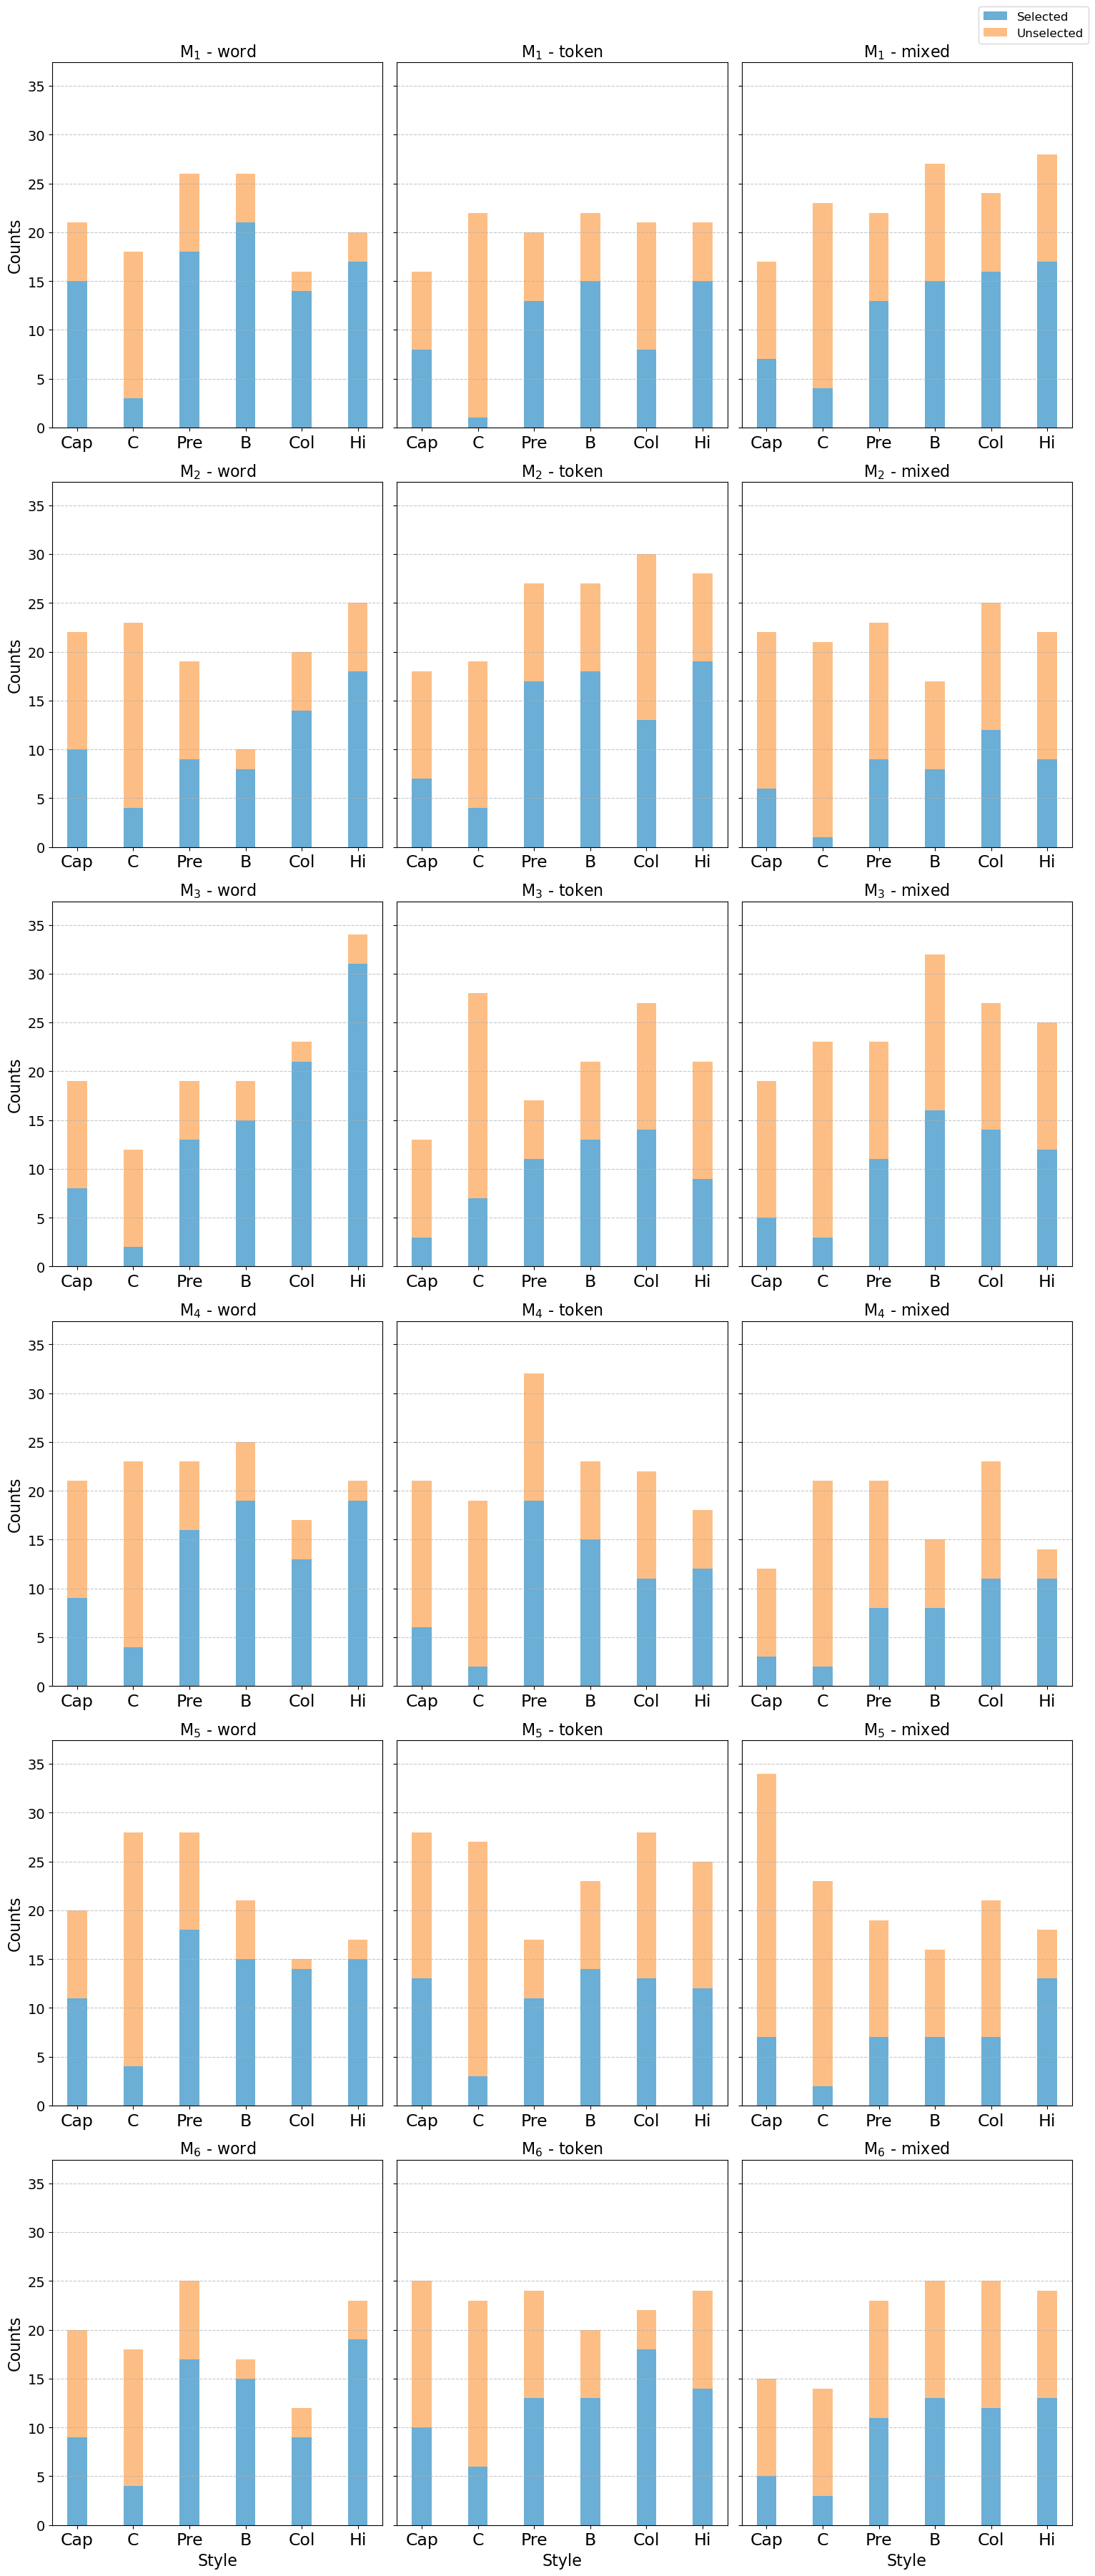

In [14]:
df = df_all_phone

df['unselected'] = df['appeared'] - df['selected']

layouts = [
    'left-aligned',
    'middle-aligned', 
    'right-aligned',
    'diagonal',
    'anti-diagonal',
    'random'
]

layout_to_m = {
    'left-aligned':  r'M$_1$',
    'middle-aligned': r'M$_2$',
    'right-aligned': r'M$_3$',
    'diagonal': r'M$_4$',
    'anti-diagonal': r'M$_5$',
    'random': r'M$_6$'
}

infected_levels = ['word', 'token', 'mixed']
fonttypes = ['cap-flipping', 'cloze', 'precomposed', 'bold', 'color', 'highlight']
fonttype_to_short = {
    'cap-flipping': 'Cap',  
    'cloze': 'C',
    'precomposed': 'Pre',
    'bold': 'B',
    'color': 'Col',
    'highlight': 'Hi'
}


n_layouts = len(layouts)
n_infected_levels = len(infected_levels)

fig, axes = plt.subplots(n_layouts, n_infected_levels, figsize=(16, 6 * n_layouts), sharey=True, squeeze=False)

plt.subplots_adjust(wspace=0.2, hspace=0.4)

bar_width = 0.35 

selected_color = '#6baed6' # light blue
unselected_color = '#fdbe85' # light orange

for i, current_layout in enumerate(layouts):
    for j, current_infected_level in enumerate(infected_levels):
        ax = axes[i, j]

        subplot_df = df[(df['layout'] == current_layout) & (df['infected_level'] == current_infected_level)]

        fonttypes_for_plot = fonttypes

        index = np.arange(len(fonttypes_for_plot))

        # Prepare data for stacked bars
        selected_counts = []
        unselected_counts = []
        appeared_totals = []

        for ftype in fonttypes_for_plot:
            ftype_data = subplot_df[subplot_df['fonttype'] == ftype]
            if not ftype_data.empty:
                selected_counts.append(ftype_data['selected'].values[0])
                unselected_counts.append(ftype_data['unselected'].values[0])
                appeared_totals.append(ftype_data['appeared'].values[0])
            else:
                # Handle cases where a specific fonttype might be missing for a layout/infected_level combo
                selected_counts.append(0)
                unselected_counts.append(0)
                appeared_totals.append(0)


        # Plot selected bars
        rects_selected = ax.bar(index, selected_counts, bar_width, label='Selected', color=selected_color)
        rects_unselected = ax.bar(index, unselected_counts, bar_width, bottom=selected_counts, label='Unselected', color=unselected_color)
        
        layout_label = layout_to_m.get(current_layout, current_layout)
        
        ax.set_title(f'{layout_label} - {current_infected_level}', fontsize=16)

        short_labels = [fonttype_to_short[ft] for ft in fonttypes_for_plot]

        ax.set_xticks(index)
        ax.set_xticklabels(short_labels, rotation=0, ha='center', fontsize=17)

        if j == 0:
            ax.set_ylabel('Counts', fontsize=16)
        if i == n_layouts - 1:
            ax.set_xlabel('Style', fontsize=16)

        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='y', labelsize=14)


max_appeared = df['appeared'].max()
for row_axes in axes:
    for ax in row_axes:
        ax.set_ylim(0, max_appeared * 1.1) 

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.96, 1.002),  frameon=True, fontsize=12)

plt.tight_layout(rect=[0, 0, 0.95, 0.99]) 

plt.savefig('Phone - Selected vs. Appeared Counts.pdf')


### The corrected clustered bar chart showing 'rate' with 95% binomial confidence intervals


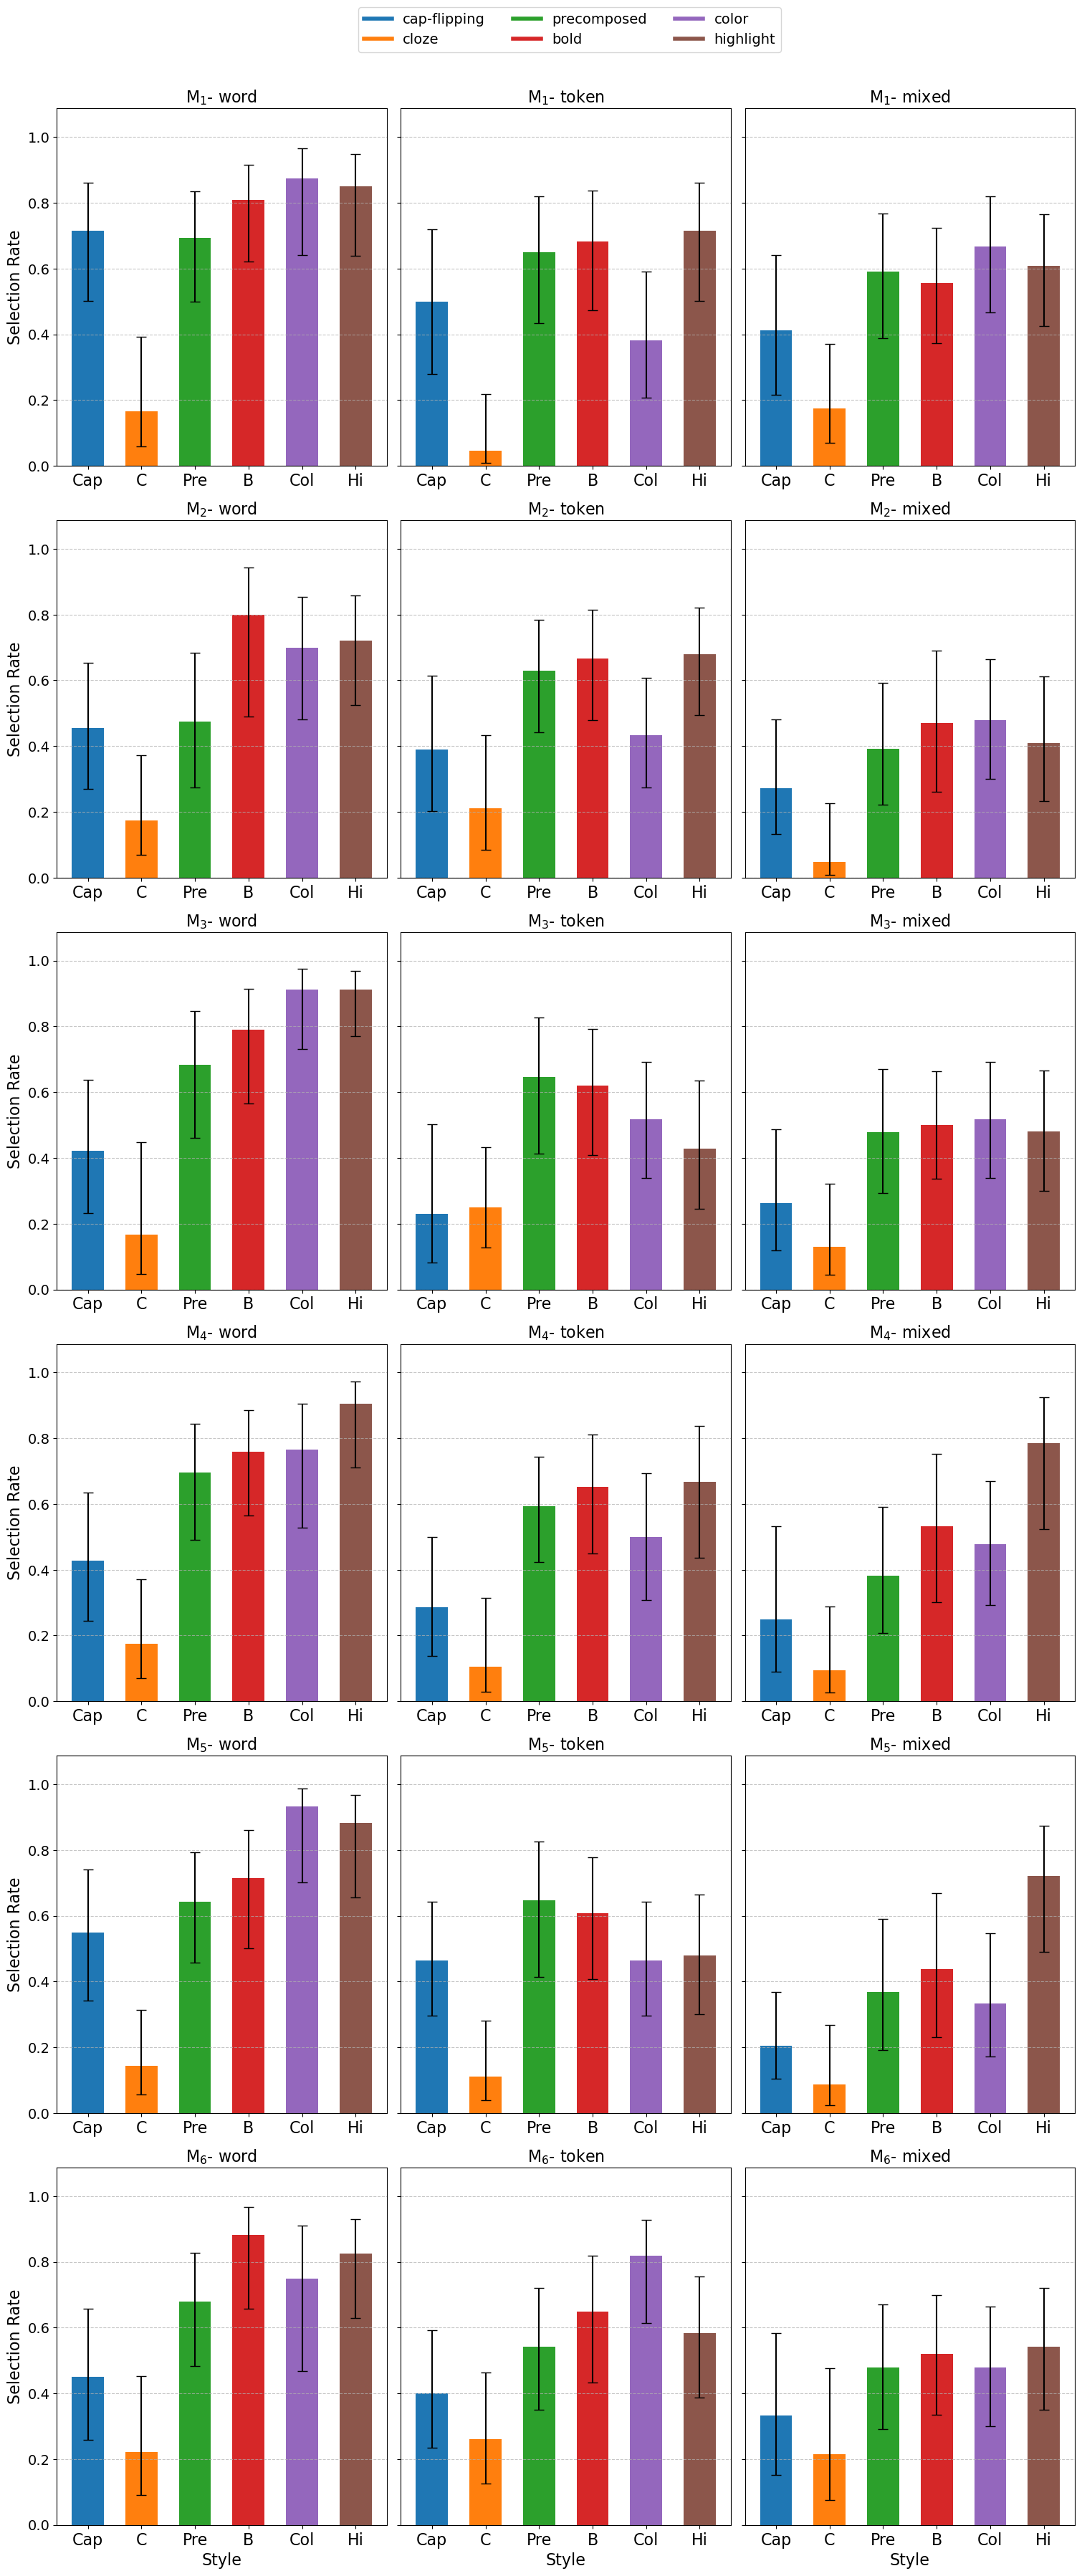

In [15]:
df_rate_graph_phone = df_all_phone

# Calculate Binomial Confidence Intervals for the 'rate'
df_rate_graph_phone['rate_ci_lower'] = np.nan
df_rate_graph_phone['rate_ci_upper'] = np.nan

for index, row in df_rate_graph_phone.iterrows():
    if row['appeared'] > 0:
        conf_int_lower, conf_int_upper = proportion_confint(
            count=row['selected'],
            nobs=row['appeared'],
            alpha=0.05, # For 95% confidence interval
            method='wilson' # A robust method for binomial proportions
        )
        df_rate_graph_phone.at[index, 'rate_ci_lower'] = conf_int_lower
        df_rate_graph_phone.at[index, 'rate_ci_upper'] = conf_int_upper
    else:
        # If 'appeared' is 0, the rate is 0, and the confidence interval is [0,0]
        df_rate_graph_phone.at[index, 'rate_ci_lower'] = 0.0
        df_rate_graph_phone.at[index, 'rate_ci_upper'] = 0.0

# Calculate the error bar lengths from the mean rate

df_rate_graph_phone['error_lower'] = df_rate_graph_phone['rate'] - df_rate_graph_phone['rate_ci_lower']
df_rate_graph_phone['error_upper'] = df_rate_graph_phone['rate_ci_upper'] - df_rate_graph_phone['rate']



# Mapping layout to M-number with subscript
layout_to_m = {
    'left-aligned': r'M$_1$',
    'middle-aligned': r'M$_2$',
    'right-aligned': r'M$_3$',
    'diagonal': r'M$_4$',
    'anti-diagonal': r'M$_5$',
    'random': r'M$_6$'
}


infected_levels = df_rate_graph_phone['infected_level'].unique()
# infected_levels = ['word', 'token', 'mixed']

all_fonttypes = ['cap-flipping', 'cloze', 'precomposed', 'bold', 'color', 'highlight']

all_fonttype_to_short = {
    'cap-flipping': 'Cap',  
    'cloze': 'C',
    'precomposed': 'Pre',
    'bold': 'B',
    'color': 'Col',
    'highlight': 'Hi'
}

n_layouts = len(layouts)
n_infected_levels = len(infected_levels)

# Create the figure and subplots for rate with CI
fig, axes = plt.subplots(n_layouts, n_infected_levels, figsize=(16, 6 * n_layouts), sharey=True, squeeze=False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.4) 

bar_width = 0.6 # Width for each bar


colors = sns.color_palette("tab10", n_colors=len(all_fonttypes))

# Mapping from fonttype to color for consistent coloring across subplots
fonttype_color_map = {ftype: colors[i] for i, ftype in enumerate(all_fonttypes)}


# Loop through each layout (rows of subplots)
for i, current_layout in enumerate(layouts):
    # Loop through each infected_level (columns of subplots)
    for j, current_infected_level in enumerate(infected_levels):
        ax = axes[i, j]

        # Filter data for the current subplot
        subplot_df = df_rate_graph_phone[(df_rate_graph_phone['layout'] == current_layout) & (df_rate_graph_phone['infected_level'] == current_infected_level)]
        
        # Positions for the bars on the x-axis for fonttypes (using all_fonttypes)
        x_positions = np.arange(len(all_fonttypes))

        # Plot bars for each fonttype
        for k, ftype in enumerate(all_fonttypes): 
            
            ftype_data = subplot_df[subplot_df['fonttype'] == ftype] 

            if not ftype_data.empty: # Only plot if data exists for this specific fonttype in this subplot
                rate_val = ftype_data['rate'].values[0]
                error_lower_val = ftype_data['error_lower'].values[0]
                error_upper_val = ftype_data['error_upper'].values[0]

                ax.bar(x_positions[k], rate_val, bar_width,
                       yerr=[[error_lower_val], [error_upper_val]], # Way to pass single asymmetrical error for one bar
                       capsize=5,
                       label=ftype,
                       color=fonttype_color_map[ftype])
            # If ftype_data is empty, no bar is plotted, which is the correct behavior.

        # Customize subplot titles and labels
        layout_label = layout_to_m.get(current_layout, current_layout)

        ax.set_title(f'{layout_label}- {current_infected_level}', fontsize=16)

        short_labels = [all_fonttype_to_short[ft] for ft in all_fonttypes]
        ax.set_xticks(x_positions)
        ax.set_xticklabels(short_labels, rotation=0, ha='center', fontsize=16) 

        # Set Y-axis label only for the first column of subplots
        if j == 0:
            ax.set_ylabel('Selection Rate', fontsize=16)
        # Set X-axis label only for the bottom row of subplots
        if i == n_layouts - 1:
            ax.set_xlabel('Style', fontsize=16)

        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='y', labelsize=14)

# Set a common Y-axis limit for all subplots based on the maximum 'rate' value (including upper CI)
max_rate = df_rate_graph_phone['rate_ci_upper'].max()
for row_axes in axes:
    for ax in row_axes:
        ax.set_ylim(0, max_rate * 1.1) # Add some padding above the max value


# Create a single legend for the entire figure (for fonttypes)
handles = [plt.Line2D([0], [0], color=fonttype_color_map[ftype], lw=4) for ftype in all_fonttypes]
labels = all_fonttypes

# fig.legend(handles, labels, title='Font Type', loc='upper right', bbox_to_anchor=(0.96, 1.0112), frameon=True, fontsize=10)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=3, frameon=True, fontsize=14)


# Adjust layout to ensure everything fits
plt.tight_layout(rect=[0, 0, 0.95, 0.97]) 

# plt.savefig('rate_clustered_bar_chart_by_hierarchy_(phone)_mode_update.pdf')
plt.savefig('Phone - Selection Rate by Mode, Level, and Style with 95% Confidence Intervals.pdf')


